### Katarina - Intäkter per månad/ vecka

In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [3]:
import pandas as pd
import metrics as M
import viz as V
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("../data/ecommerce_sales.csv", parse_dates=["date"])

In [5]:
print("Intäkter per månad:")
display(M.revenue_month(df))

Intäkter per månad:


,month,revenue
0,2024-01,664083.32
1,2024-02,548462.03
2,2024-03,487602.00
3,2024-04,580194.83
4,2024-05,632165.16
5,2024-06,590259.89


In [6]:
print("Intäkter per vecka (sorterad):")
display(M.sorted_weeks(df))

Intäkter per vecka (sorterad):


,week,revenue
22,2024-06-03/2024-06-09,166384.34
3,2024-01-22/2024-01-28,165832.80
0,2024-01-01/2024-01-07,161119.04
15,2024-04-15/2024-04-21,157775.20
20,2024-05-20/2024-05-26,156746.92
2,2024-01-15/2024-01-21,147225.11
14,2024-04-08/2024-04-14,146409.48
21,2024-05-27/2024-06-02,144516.63
25,2024-06-24/2024-06-30,142431.78
17,2024-04-29/2024-05-05,140330.00


Graf för intäkt per månad:


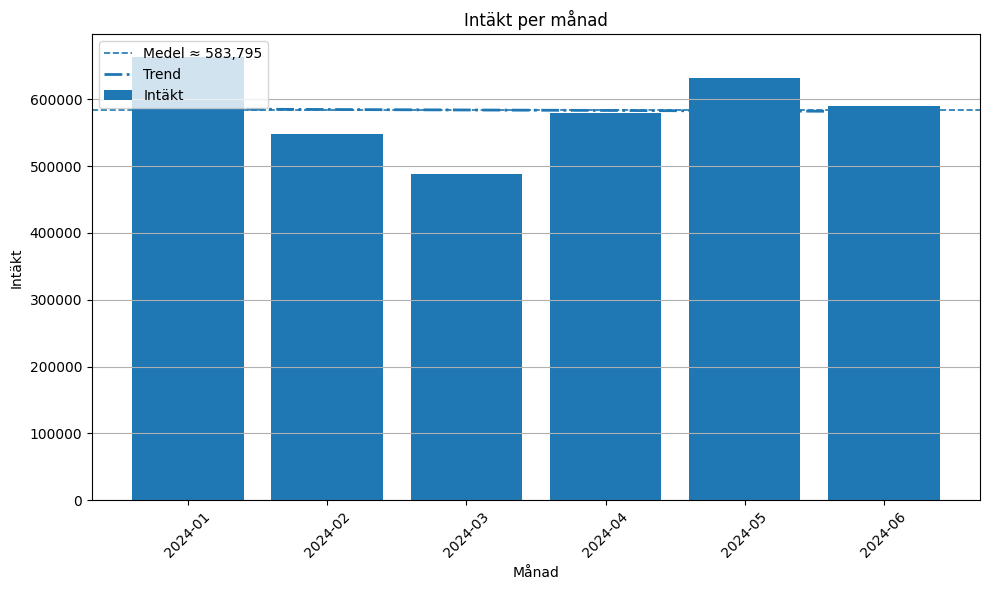

Graf för intäkt per vecka:


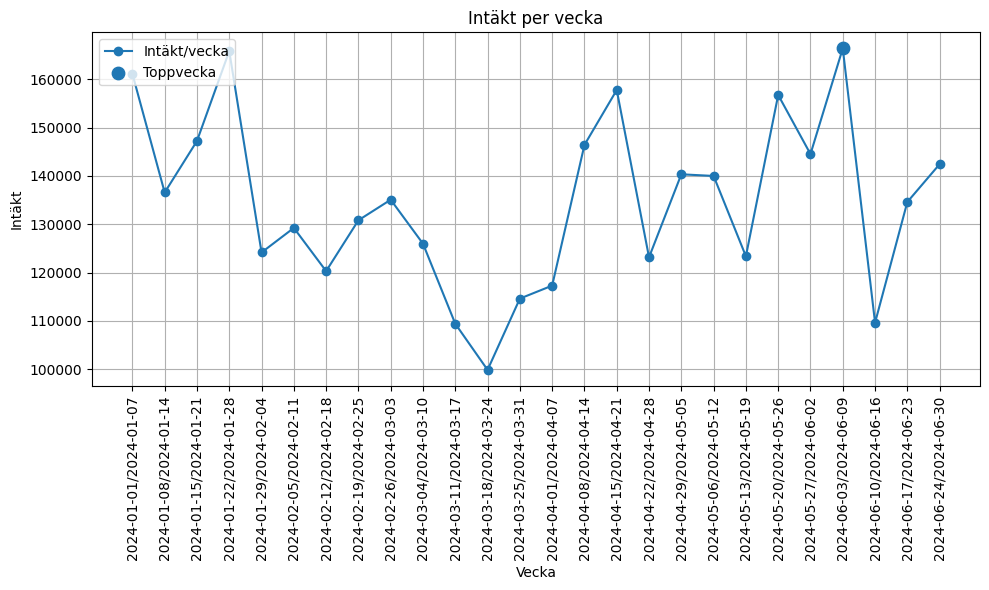

In [7]:
print("Graf för intäkt per månad:")
V.plot_revenue_month(df)

print("Graf för intäkt per vecka:")
V.plot_revenue_week(df)

Magdalena - Försäljning per stad

In [8]:
by_city = M.revenue_per_city(df)
by_cat = M.top_categorys(df)
by_city
by_cat.head(3) # Top 3 kategorier

,category,revenue
0,Electronics,1364228.07
1,Sports,734653.42
2,Clothing,586744.91


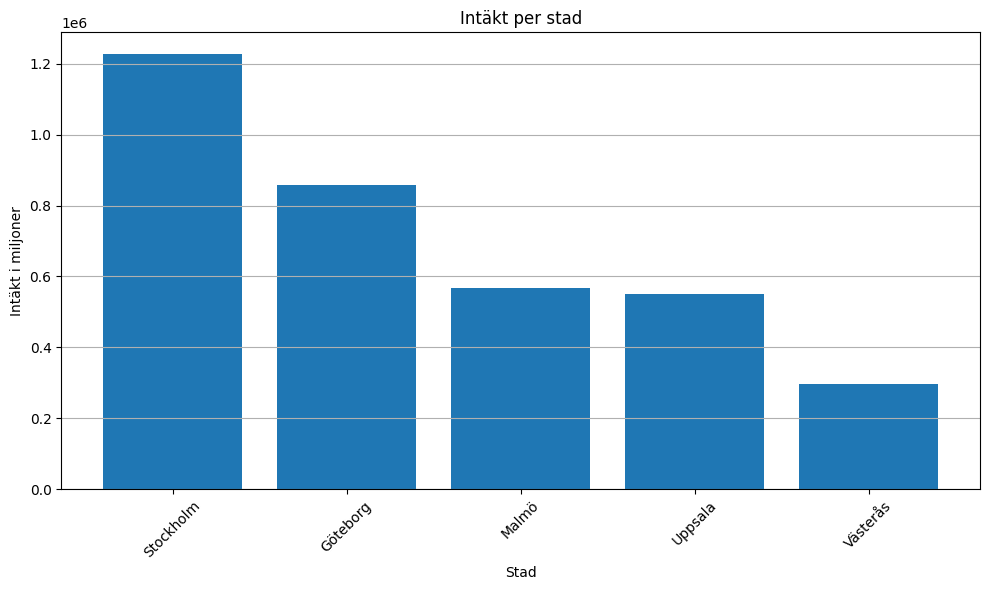

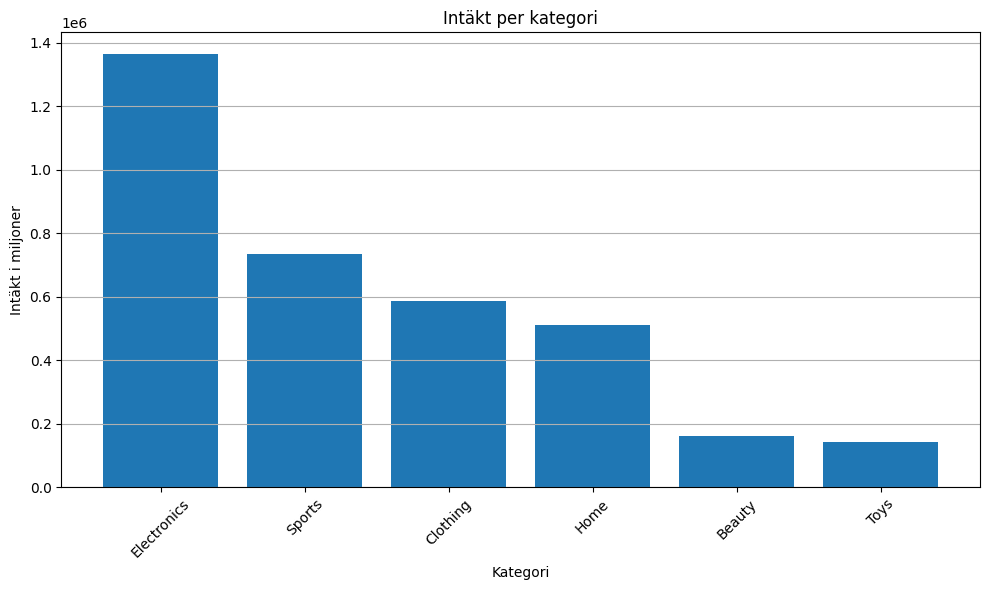

In [ ]:
# Intäkt per stad
fig, ax = plt.subplots(figsize=(10, 6)) # skapar en graf med sepererade staplar för varje stad
V.bar(ax, by_city["city"], by_city["revenue"], "Intäkt per stad", "Stad", "Intäkt i miljoner")
plt.savefig("../data/images/fig_intakt_per_stad.png", dpi=200)

# Intäkt per kategori
fig, ax = plt.subplots(figsize=(10, 6)) # skapar en graf med sepererade staplar för varje stad
V.bar(ax, by_cat["category"], by_cat["revenue"], "Intäkt per kategori", "Kategori", "Intäkt i miljoner")
plt.savefig("../data/images/fig_intakt_per_kategori.png", dpi=200)
plt.show()

# Kevin - AOV

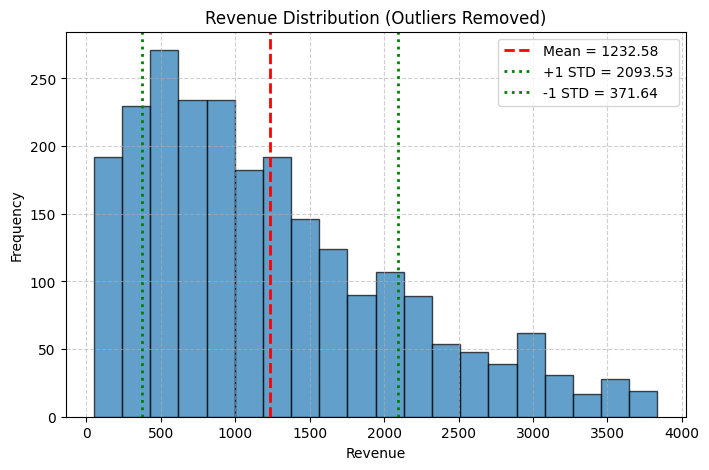

In [10]:

df = pd.read_csv("../data/ecommerce_sales.csv")

np_orders = np.array(df.revenue)

q1 = np.percentile(np_orders, 25)
q3 = np.percentile(np_orders, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_orders = np_orders[(np_orders >= lower_bound) & (np_orders <= upper_bound)]

std = np.std(filtered_orders)

mean = np.mean(filtered_orders)

plt.figure(figsize=(8, 5))
plt.hist(filtered_orders, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean:.2f}")
plt.axvline(mean + std, color='green', linestyle='dotted', linewidth=2, label=f"+1 STD = {mean + std:.2f}")
plt.axvline(mean - std, color='green', linestyle='dotted', linewidth=2, label=f"-1 STD = {mean - std:.2f}")

plt.title("Revenue Distribution (Outliers Removed)")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Rekomendationer när det gäller intäkter per månad/vecka:

- Tänk på en stark marknadsföring under januari och maj. Dessa månader visar redan höga intäkter och har potential att generera ännu större omsättning.

- Fundera över åtgärder för att motverka nedgången i mars, (kanske kampanjer eller rabatter) för att jämna ut intäktsnivåerna. 

- Fortsätt analysera och jobba med veckoresultaten för att få fram och identifera återkommande veckor med toppar/dalar och anpassa bemanning och lager därefter för maximal effektivitet och besparing. 